# **`Chronic Kidney Prediction`**

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading dataset
df = pd.read_csv('kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


## **`Dataset Description`**
- age		-	age	
- bp		-	blood pressure
- sg		-	specific gravity
- al		-   	albumin
- su		-	sugar
- rbc		-	red blood cells
- pc		-	pus cell
- pcc		-	pus cell clumps
- ba		-	bacteria
- 	bgr		-	blood glucose random
-			bu		-	blood urea
-			sc		-	serum creatinine
-			sod		-	sodium
-			pot		-	potassium
-			hemo		-	hemoglobin
-			pcv		-	packed cell volume
-			wc		-	white blood cell count
-			rc		-	red blood cell count
-			htn		-	hypertension
-			dm		-	diabetes mellitus
-			cad		-	coronary artery disease
-			appet		-	appetite
-			pe		-	pedal edema
-			ane		-	anemia
-			class		-	class	
- ##################################################
%
- Number of Attributes: 24 + class = 25 ( 11  numeric ,14  nominal) 
%
<h3>Attribute Information :</h3>
- 1.Age(numerical)
  	  	age in years
- 	2.Blood Pressure(numerical)
	       	bp in mm/Hg
-	3.Specific Gravity(nominal)
	  	sg - (1.005,1.010,1.015,1.020,1.025)
- 	4.Albumin(nominal)
		  al - (0,1,2,3,4,5)
-	5.Sugar(nominal)
		  su - (0,1,2,3,4,5)
- 	6.Red Blood Cells(nominal)
		  rbc - (normal,abnormal)
- 	7.Pus Cell (nominal)
		  pc - (normal,abnormal)
- 	8.Pus Cell clumps(nominal)
		  pcc - (present,notpresent)
- 	9.Bacteria(nominal)
		  ba  - (present,notpresent)
- 	10.Blood Glucose Random(numerical)		
		  bgr in mgs/dl
- 	11.Blood Urea(numerical)	
		  bu in mgs/dl
- 	12.Serum Creatinine(numerical)	
		  sc in mgs/dl
- 	13.Sodium(numerical)
		  sod in mEq/L
- 	14.Potassium(numerical)	
		  pot in mEq/L
- 	15.Hemoglobin(numerical)
		  hemo in gms
- 	16.Packed  Cell Volume(numerical)
- 	17.White Blood Cell Count(numerical)
		  wc in cells/cumm
- 	18.Red Blood Cell Count(numerical)	
		  rc in millions/cmm
- 	19.Hypertension(nominal)	
		  htn - (yes,no)
- 	20.Diabetes Mellitus(nominal)	
		  dm - (yes,no)
- 	21.Coronary Artery Disease(nominal)
		  cad - (yes,no)
- 	22.Appetite(nominal)	
	    appet - (good,poor)
- 	23.Pedal Edema(nominal)
		  pe - (yes,no)	
- 	24.Anemia(nominal)
		  ane - (yes,no)
- 	25.Class (nominal)		
		  class - (ckd,notckd)

In [3]:
# checking info of columns and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

## **`Data Cleaning`**

In [4]:
# dropping id column
df = df.drop(columns='id')
df.head(2)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd


In [5]:
# renaming column names to make it more user-friendly

df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'anemia', 'class']

In [6]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


### According to the data description
- Cols(pcv, wc and rc) needs to convert back in numerical since it is object right now
- Cols(sg, al and su) should be nominal , convert from float to object

In [7]:
# converting necessary columns like packed_cell_volume, white_blood_cell_count and red_blood_cell_count
# currently it is in object type and converting back to numerical type

df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,391.0,51.483376,17.169714,2.000,42.00,55.00,64.50,90.000
blood_pressure,388.0,76.469072,13.683637,50.000,70.00,80.00,80.00,180.000
specific_gravity,353.0,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
albumin,354.0,1.016949,1.352679,0.000,0.00,0.00,2.00,5.000
sugar,351.0,0.450142,1.099191,0.000,0.00,0.00,0.00,5.000
blood_glucose_random,356.0,148.036517,79.281714,22.000,99.00,121.00,163.00,490.000
blood_urea,381.0,57.425722,50.503006,1.500,27.00,42.00,66.00,391.000
serum_creatinine,383.0,3.072454,5.741126,0.400,0.90,1.30,2.80,76.000
sodium,313.0,137.528754,10.408752,4.500,135.00,138.00,142.00,163.000
potassium,312.0,4.627244,3.193904,2.500,3.80,4.40,4.90,47.000


In [9]:
# Extracting categorical and numerical columns

cat_cols = df.select_dtypes('object').columns
num_cols = df.select_dtypes('number').columns

In [10]:
cat_cols

Index(['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'hypertension', 'diabetes_mellitus', 'coronary_artery_disease',
       'appetite', 'peda_edema', 'anemia', 'class'],
      dtype='object')

In [11]:
num_cols

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count'],
      dtype='object')

In [12]:
# by looping & looking at unique values in categorical columns
for col in cat_cols:
    print(f'{col} has {df[col].unique()} values\n')

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

anemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



In [13]:
# replacing incorrect values like '\tno', '\tyes', ' yes', '\tno', 'ckd\t', 'notckd'  in categorical cols
df['diabetes_mellitus'].replace({' yes':'yes', '\tno':'no', '\tyes':'yes'}, inplace=True)
df['coronary_artery_disease'].replace({'\tno':'no'}, inplace=True)
df['class'].replace({'ckd\t':'ckd'}, inplace=True)

In [14]:
# Converting target col class into 0(NOT chronic kidney) and 1(chronic kidney)
df['class'].replace({'ckd':1, 'notckd':0}, inplace=True)

# converting target col into numeric to check correlation
df['class'] = pd.to_numeric(df['class'], errors='coerce')

In [15]:
df.head(3)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,1
1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,1
2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,1


In [16]:
# let's see the cols in numerical col list
[col for col in num_cols]

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

## **`EDA`**

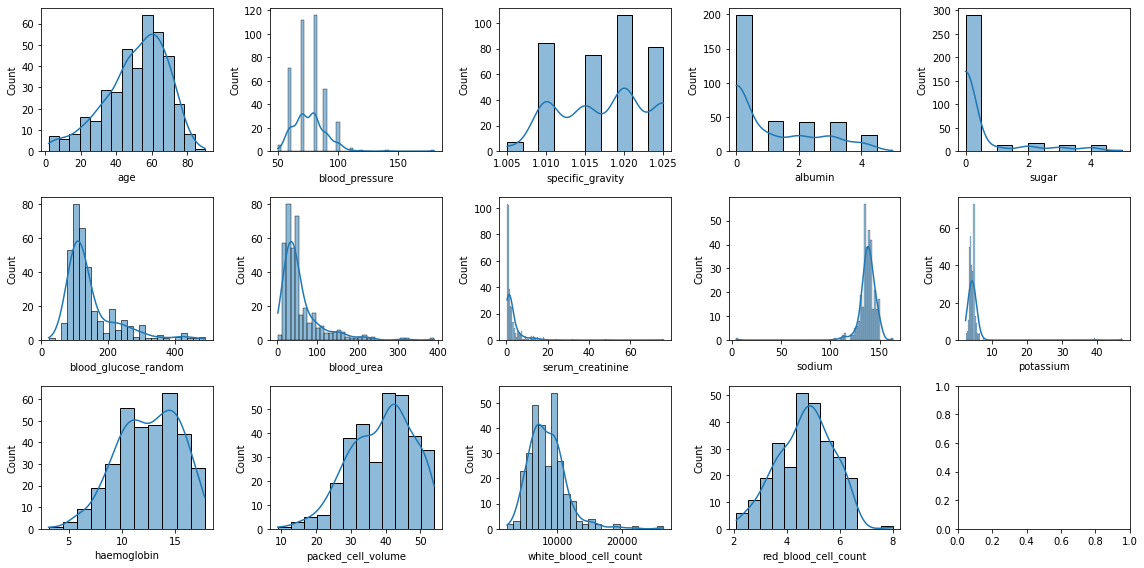

In [17]:
# checking numerical features distribution
k=1
plt.subplots(3,5,figsize=(16,8))
for col in num_cols:
    plt.subplot(3,5,k)
    sns.histplot(df[col], kde=True)
    k+=1
    plt.tight_layout()


In [18]:
# let's see the cols in cat col list
[col for col in cat_cols]

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'anemia',
 'class']

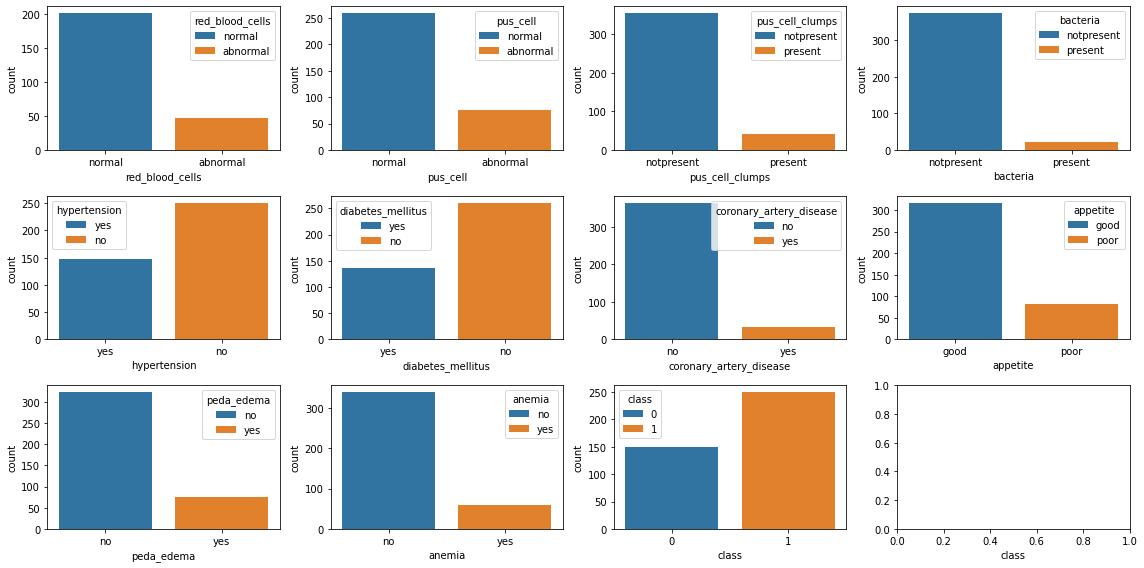

In [19]:
# checking cat features distribution

# creating the figure and axes

fig, axes = plt.subplots(3, 4, figsize=(16,8))

axes = axes.ravel()  # flattening the array makes indexing easier

# looping over cat cols and plot countplot

for col,ax in zip(cat_cols,axes):
    sns.countplot(data=df, x=col, ax=ax, hue=col)
    plt.xlabel(col)
    #for p in ax.patches:
    #    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
    fig.tight_layout()

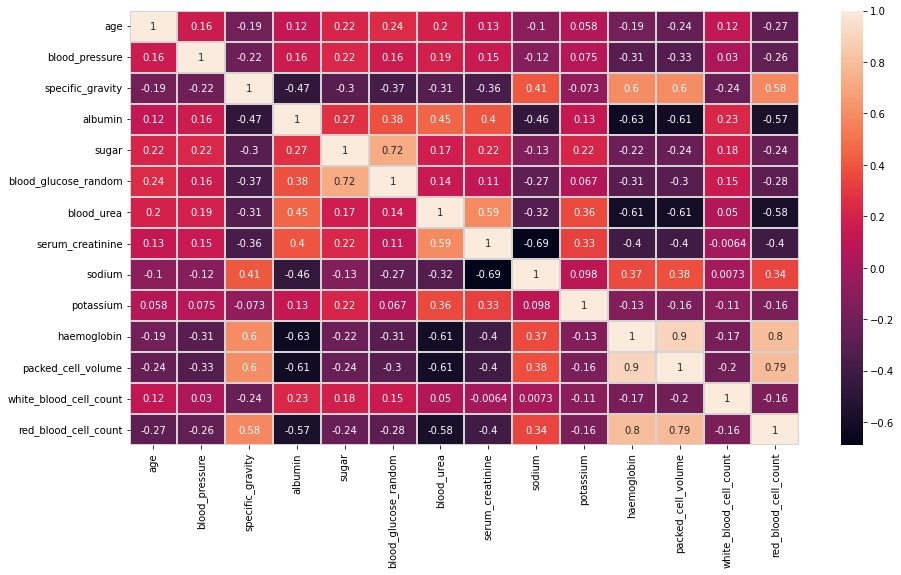

In [20]:
# correlated heatmap of data
plt.figure(figsize = (15, 8))
sns.heatmap(df[num_cols].corr(), annot=True, linewidths=2, linecolor='lightgrey')
plt.show()

In [21]:
# let's check count of null values in whole df
df.isnull().sum().sort_values(ascending=False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
anemia                       1
class                        0
dtype: int64

In [22]:
# let's check count of null values in num_cols
df[num_cols].isnull().sum()

age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

In [23]:
# let's check count of null values in cat cols
df[cat_cols].isnull().sum()

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
anemia                       1
class                        0
dtype: int64

## **`Missing Value Treatment`**

In [24]:
# filling null values, we will use two methods, random sampling for higher null values and 
# mean/mode sampling for lower null values

# creating function for imputing random values
def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample
    
# creating function for imputing most common value(modal value)
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [25]:
# filling num_cols null values using random sampling method
for col in num_cols:
    random_value_imputation(col)

In [26]:
# let's check count of null values in num_cols again
df[num_cols].isna().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [27]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation

random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

In [28]:
for col in cat_cols:
    impute_mode(col)

In [29]:
# let's check count of null values in cat_cols again
df[cat_cols].isna().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
anemia                     0
class                      0
dtype: int64

In [30]:
# checking unique values in each cat col by looping over cat cols

for col in cat_cols:
    print(f'{col} has {df[col].nunique()} categories\n')


red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

anemia has 2 categories

class has 2 categories



In [31]:
# checking df after transforming cat cols
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,1
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,214.0,...,38.0,6000.0,6.1,no,no,no,good,no,no,1
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,5.8,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,1


In [32]:
# Splitting data into features and target variables (X and y)
X = df.drop(columns='class')
y = df['class']

In [33]:
# splitting data into training and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [34]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 320 entries, 336 to 172
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      320 non-null    float64
 1   blood_pressure           320 non-null    float64
 2   specific_gravity         320 non-null    float64
 3   albumin                  320 non-null    float64
 4   sugar                    320 non-null    float64
 5   red_blood_cells          320 non-null    object 
 6   pus_cell                 320 non-null    object 
 7   pus_cell_clumps          320 non-null    object 
 8   bacteria                 320 non-null    object 
 9   blood_glucose_random     320 non-null    float64
 10  blood_urea               320 non-null    float64
 11  serum_creatinine         320 non-null    float64
 12  sodium                   320 non-null    float64
 13  potassium                320 non-null    float64
 14  haemoglobin              320 

In [35]:
# Some stats about the features:
for col in X.columns:
    if df[col].dtype == 'float64':
        print(f'{col} :- min {min(df[col])}, max {max(df[col])}')
    else:
        print(f'{col} :- {df[col].unique()}')

age :- min 2.0, max 90.0
blood_pressure :- min 50.0, max 180.0
specific_gravity :- min 1.005, max 1.025
albumin :- min 0.0, max 5.0
sugar :- min 0.0, max 5.0
red_blood_cells :- ['normal' 'abnormal']
pus_cell :- ['normal' 'abnormal']
pus_cell_clumps :- ['notpresent' 'present']
bacteria :- ['notpresent' 'present']
blood_glucose_random :- min 22.0, max 490.0
blood_urea :- min 1.5, max 391.0
serum_creatinine :- min 0.4, max 76.0
sodium :- min 4.5, max 163.0
potassium :- min 2.5, max 47.0
haemoglobin :- min 3.1, max 17.8
packed_cell_volume :- min 9.0, max 54.0
white_blood_cell_count :- min 2200.0, max 26400.0
red_blood_cell_count :- min 2.1, max 8.0
hypertension :- ['yes' 'no']
diabetes_mellitus :- ['yes' 'no']
coronary_artery_disease :- ['no' 'yes']
appetite :- ['good' 'poor']
peda_edema :- ['no' 'yes']
anemia :- ['no' 'yes']


## **`Pipeline & Model building`**

In [36]:
trf1 = ColumnTransformer([
    ('mean', SimpleImputer(strategy='mean'), [0,1,2,3,4,9,10,11,12,13,14,15,16,17]),
    ('mode', SimpleImputer(strategy='most_frequent'), [5,6,7,8,18,19,20,21,22,23]),
], remainder='passthrough')

In [37]:
trf2 = ColumnTransformer([
    ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'), slice(14,24))
], remainder='passthrough')

In [38]:
trf3 = RandomForestClassifier()

In [39]:
pipe = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2),
    ('trf3', trf3)
])

In [40]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('mean', SimpleImputer(),
                                                  [0, 1, 2, 3, 4, 9, 10, 11, 12,
                                                   13, 14, 15, 16, 17]),
                                                 ('mode',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [5, 6, 7, 8, 18, 19, 20, 21,
                                                   22, 23])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  slice(14, 24, None))])),
         

In [41]:
accuracy_score(y_test, pipe.predict(X_test))

0.975

In [42]:
confusion_matrix(y_test, pipe.predict(X_test))

array([[26,  2],
       [ 0, 52]], dtype=int64)

In [43]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        28
           1       0.96      1.00      0.98        52

    accuracy                           0.97        80
   macro avg       0.98      0.96      0.97        80
weighted avg       0.98      0.97      0.97        80



- This model is giving a very high accuracy of 97.5% with good recall & precision
- We will be exporting this trained pipeline containing Random Forest model for deployment

In [44]:
pickle.dump(pipe, open('model.pkl', 'wb'))

- This model.pkl file will be performing preprocessing of the data before prediction